# Activity 2

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from simple_colors import *
import pandas as pd
from numpy import asarray

matrix of m x n images:
[[130 130 130 ... 130 130 130]
 [130 130 130 ... 130 130 130]
 [130 130 130 ... 130 130 130]
 ...
 [ 68  68  68 ...  68  68  68]
 [ 68  68  68 ...  68  68  68]
 [ 68  68  68 ...  68  68  68]]

Dimension of m x n matrix
(77760, 165)

Mean of dataset
[123.48484848 123.50909091 123.77575758 ...  68.          68.
  68.        ]

The shape of the mean of dataset
(77760,)

The shape of converted mean vector into array for image
(243, 320)

The mean image is plotted below


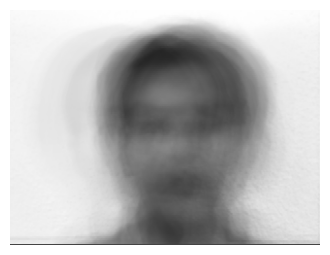


normalized matrix of m x n images:
[[6.51515152 6.51515152 6.51515152 ... 6.51515152 6.51515152 6.51515152]
 [6.49090909 6.49090909 6.49090909 ... 6.49090909 6.49090909 6.49090909]
 [6.22424242 6.22424242 6.22424242 ... 6.22424242 6.22424242 6.22424242]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Dimension of normalized m x n matrix
(77760, 165)


In [2]:
# converting all faces to vectors

matrix1 = []
path = 'data'
images = os.listdir(path)
for i in images:
    x = Image.open(os.path.join(path,i))
    predata = np.asarray(x)
    shape = predata.shape
    # we can use below syntax to view each image if we need to, otherwise we may ignore these
    
    #print('image title:', i)  we can use this to see 
    #print('class of converted image into array:',type(predata)) 
    #print('shape of the converted image into array=',shape)
    
    data1 = predata.ravel()
    reshape = data1.T
    matrix1.append(reshape)
    #print('class of 1D array:',  type(data1))
    #print('Dimension of 1D array:',data1.shape)
    #print()
    
# Putting 1D vector in columns of matrix m x n    
matrix2 = np.array(matrix1).T
print(magenta('matrix of m x n images:',['bold','reverse']))
print(matrix2)
print()
print(magenta('Dimension of m x n matrix',['bold','reverse']))
print(matrix2.shape)
print()

# calculating the mean face

mean = np.zeros(matrix2.shape[0])
for i in range(0,matrix2.shape[0]):
    mean[i] = (sum(matrix2[i,:]))/matrix2.shape[1]
print(blue('Mean of dataset',['bold','reverse']))
print(mean)
print()
print(blue('The shape of the mean of dataset',['bold','reverse']))
print(mean.shape)
print()


#plotting the mean face

imgdata = np.asarray(mean).reshape(shape)
print(yellow('The shape of converted mean vector into array for image',['bold','reverse']))
print(imgdata.shape)
print()
print(red('The mean image is plotted below',['bold','reverse']))
meanimage = Image.fromarray(imgdata)
plt.figure(figsize=(4,4))
plt.style.use('default')
plt.axis('off')
plt.imshow(meanimage, cmap='Greys_r')
#plt.savefig('q2.png')
plt.show()
print()

# normalizing the dataset

matrix3 = np.zeros((matrix2.shape[0],matrix2.shape[1]))
for j in range(0,matrix2.shape[1]):
    matrix3[:,j] = matrix2[:,j] - mean
    

print(green('normalized matrix of m x n images:',['bold','reverse']))
print(matrix3)
print()
print(green('Dimension of normalized m x n matrix',['bold','reverse']))
print(matrix3.shape)


In [3]:
# writing a function img2vec
def img2vec(img):
    image = Image.open(img)
    plt.figure(figsize=(4,4))
    plt.style.use('default')
    plt.imshow(image, cmap='Greys_r')
    plt.axis('off')
    plt.show()    
    data = np.asarray(image)
    print(blue('The type of converted image into array',['bold','reverse']),   type(data))
    print(magenta('The dimension of converted image into array',['bold','reverse']),  data.shape)
    print()
    data1 = data.ravel()
    reshape = data1.T
    print(blue('The class of 2D array convered into 1D array',['bold','reverse'])  ,type(reshape))
    print(magenta('The dimension of 1D array',['bold','reverse']),  reshape.shape)
    print()
    print(blue('1D array of real value is below:',['bold','reverse']))
    print(reshape)

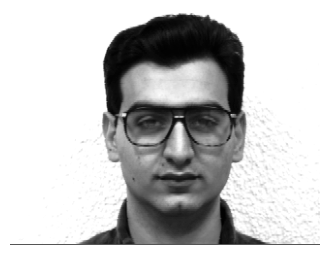

The type of converted image into array <class 'numpy.ndarray'>
The dimension of converted image into array (243, 320)

The class of 2D array convered into 1D array <class 'numpy.ndarray'>
The dimension of 1D array (77760,)

1D array of real value is below:
[130 130 130 ...  68  68  68]


In [4]:
img2vec('data/subject15.glasses') #providing the path of the image

In [5]:
# writing a function vec2img
def vec2img(array): #1D array converted with the help of img2vec function
    imgdata = np.asarray(array).reshape(243,320)
    print(magenta('The shape of the data for image',['bold']))
    print(imgdata.shape)
    image = Image.fromarray(imgdata)
    plt.figure(figsize=(4,4))
    plt.style.use('default')
    plt.axis('off')
    print()
    print(black('The image created from an array',['reverse']))
    plt.imshow(image, cmap='Greys_r')
    plt.show()

The shape of the data for image
(243, 320)

The image created from an array


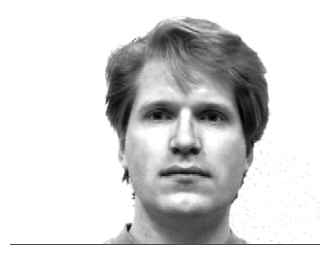

In [6]:
vec2img(matrix2[:,5]) #need to give 1D array here as argument. I have used an array from the matrix I created above.